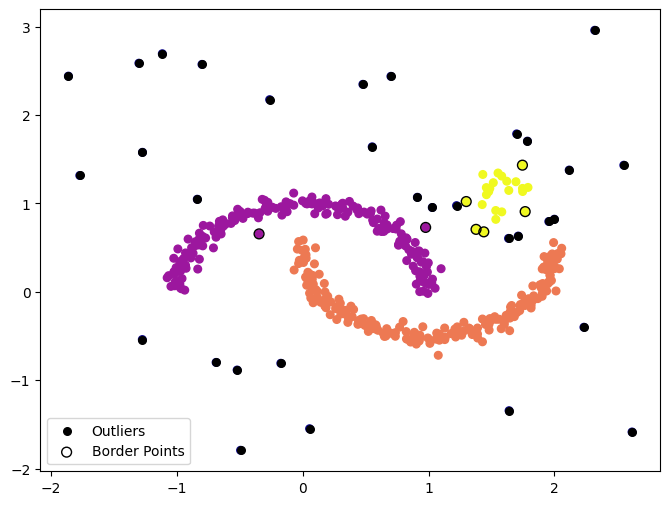

In [3]:
from sklearn.datasets import make_moons
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate crescent moons
X, _ = make_moons(n_samples=400, noise=0.05, random_state=0)

# Far outliers
far_outliers = np.random.uniform(low=-2, high=3, size=(30, 2))

# Partial outliers (near clusters)
partial_outliers = np.random.normal(loc=[1.5, 1.0], scale=0.3, size=(30, 2))

# Combine all points
X_all = np.vstack([X, far_outliers, partial_outliers])

# Apply DBSCAN
db = DBSCAN(eps=0.2, min_samples=5).fit(X_all)
labels = db.labels_

# Identify core, border, and noise points
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

plt.figure(figsize=(8,6))
plt.scatter(X_all[:,0], X_all[:,1], c=labels, cmap='plasma', s=30)
plt.scatter(X_all[labels == -1,0], X_all[labels == -1,1], c='k', s=30, label='Outliers')
plt.scatter(X_all[(labels != -1) & ~core_samples_mask,0], X_all[(labels != -1) & ~core_samples_mask,1],
            c='none', edgecolor='black', s=50, label='Border Points')
plt.legend()
plt.show()


In [ ]:
def objective(trial):
    from sklearn.metrics import silhouette_score

    eps = trial.suggest_float("eps", 0.1, 0.5)
    min_samples = trial.suggest_int("min_samples", 3, 10)

    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_all)
    labels = db.labels_

    # If all points are labeled as noise or only one cluster is found, return a poor score
    if len(set(labels)) <= 1 or np.all(labels == -1):
        return -1.0

    # Silhouette score penalized by the number of outliers
    else:
        return silhouette_score(X_all, labels)

AttributeError: 'DBSCAN' object has no attribute 'predict'